This is a first attempt to read data from an HDF5 file and apply the background correction code on it

The code directly beneath saves all images to a location on your pc

In [7]:
import h5py
import numpy as np
from PIL import Image
import matplotlib.pylab as plb
import matplotlib.pyplot as plt
import os

with h5py.File(r"C:\Users\brugg\Documents\20220703\Au_PBS_100nm_landing_gasket_10mW.hdf5", 'r') as f:
    acq = f["data/Acquisition_1"]
    image = acq["Image"]
    for i in range(len(image)):
        frame = np.asarray(image[i],dtype=np.uint8)
        im = Image.fromarray(frame, mode="L") #greyscale
        im.save(f"C:\\Users\\brugg\\\\Imagesnew\\Try6\\Image__{i:04}.bmp") #to new location/folder

In [1]:
test

NameError: name 'test' is not defined

In [14]:
hf = h5py.File(r"C:\Users\brugg\Documents\20220703\Au_PBS_100nm_landing_gasket_10mW.hdf5", 'r')

In [15]:
hf.keys()

<KeysViewHDF5 ['data']>

In [16]:
for key in hf.keys():
    print(key)

data


This piece of code shows a chosen image from the data

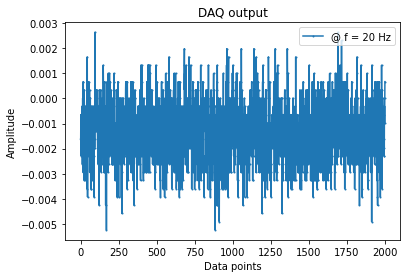

In [3]:
import h5py
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
with h5py.File(r"C:\Users\brugg\Documents\20220703\Au_PBS_100nm_landing_gasket_10mW.hdf5", 'r') as f:
    DAQ_input = f["data/Acquisition_1/DAQ-input"]
    DAQ = np.asarray(DAQ_input)

    # position_1 =f["data/Acquisition_2/Tracks/x"]
    # position_x = np.asarray(position_1)
    # position_2 = f["data/Acquisition_2/Tracks/y"]
    # position_y = np.asarray(position_2)

    #print(DAQ[0])

x = np.arange(0,stop=2000)
y = DAQ[150]

plt.plot(x,y, linestyle='-',marker='o', markersize=1, alpha=1, label= '@ f = 20 Hz')
#plt.plot(position_x,position_y, linestyle='',marker='o', markersize=1, alpha=0.4, label= '@ f = 5 Hz')
#plt.axis([-10,len(y_1),-10,max(y_1)+100])
#plt.xlim(92,94)
#plt.ylim(90, 110)
#plt.axis([0,100,0,12000])
plt.xlabel('Data points')
plt.ylabel('Amplitude')
plt.title('DAQ output')
plt.legend(loc="upper right")
plt.show()

In [18]:
import cv2
import numpy as np
import glob

img_array = []
for filename in glob.glob(r'C:\Users\brugg\Imagesnew\Try6\*.bmp'):
    img = cv2.imread(filename)
    height, width, layers = img.shape
    size = (width, height)
    img_array.append(img)
print(img.shape)
out = cv2.VideoWriter(r'C:\Users\brugg\Imagesnew\Try6\project.avi', cv2.VideoWriter_fourcc(*'DIVX'), 15, size)

for i in range(len(img_array)):
    out.write(img_array[i])

out.release()

(2048, 2048, 3)


In [39]:
import h5py
import numpy as np
from PIL import Image
import matplotlib.pylab as plb
import matplotlib.pyplot as plt
import os

im_array = []

with h5py.File(r"C:\Users\brugg\Documents\20220703\Au_PBS_100nm_landing_gasket_10mW.hdf5", 'r') as f:
    acq = f["data/Acquisition_1"]
    image = acq["Image"]
    for i in range(len(image)):
        frame = np.asarray(image[i],dtype=np.uint8)
#         print(frame)
#     im = Image.fromarray(frame, mode="L") #greyscale
        height, width = frame.shape
        size = (height,width)
        im_array.append(frame)
out = cv2.VideoWriter(r'C:\Users\brugg\Imagesnew\Try6\project2.avi', cv2.VideoWriter_fourcc(*'DIVX'), 15, size)

for i in range(len(im_array)):
    out.write(im_array[i])
out.release()

1626
1626
